In [8]:
import pandas as pd

#importa dataset
file_path = '/Users/waltermanni/Desktop/APT Data/Titanka Data/APT - Prenotazioni al 31-07.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

# Creazione del DataFrame per l'anno 2023
prenotazioni_2023 = df[['Frazione.1', 'Prenotazione - data arrivo Mese.1',
                        'Prenotazione - data Partenza Mese.1', 'Prenotazioni.1', 'Ricavi.1', 'Anno.1']]

# Rinominazione delle colonne per uniformità
prenotazioni_2023.columns = ['Frazione', 'Prenotazione - data arrivo Mese',
                             'Prenotazione - data Partenza Mese', 'Prenotazioni', 'Ricavi', 'Anno']

# Creazione del DataFrame per l'anno 2024
prenotazioni_2024 = df[['Frazione', 'Prenotazione - data arrivo Mese',
                        'Prenotazione - data Partenza Mese', 'Prenotazioni', 'Ricavi', 'Anno']]

# Unione dei DataFrame dei due anni
prenotazioni_totali = pd.concat([prenotazioni_2023, prenotazioni_2024], ignore_index=True)

# Funzione per pulire correttamente i campi monetari
def clean_monetary_value(value):
    if isinstance(value, str):
        # Rimuove i punti come separatori delle migliaia e sostituisce la virgola con il punto per i decimali
        return float(value.replace('.', '').replace(',', '.'))
    return value

# Applica la funzione ai campi monetari (ricavi)
prenotazioni_totali['Ricavi'] = prenotazioni_totali['Ricavi'].apply(clean_monetary_value)

# Mostra i primi record per la verifica
prenotazioni_totali.head()


,Frazione,Prenotazione - data arrivo Mese,Prenotazione - data Partenza Mese,Prenotazioni,Ricavi,Anno
0,Riccione,6.0,6.0,286.0,98625.27,2023.0
1,Riccione,6.0,6.0,89.0,30288.77,2023.0
2,Riccione,6.0,6.0,42.0,6575.33,2023.0
3,Riccione,6.0,6.0,6.0,6328.68,2023.0
4,Riccione,6.0,6.0,6.0,8783.60,2023.0


In [10]:
prenotazioni_totali.columns

Index(['Frazione', 'Prenotazione - data arrivo Mese',
       'Prenotazione - data Partenza Mese', 'Prenotazioni', 'Ricavi', 'Anno'],
      dtype='object')

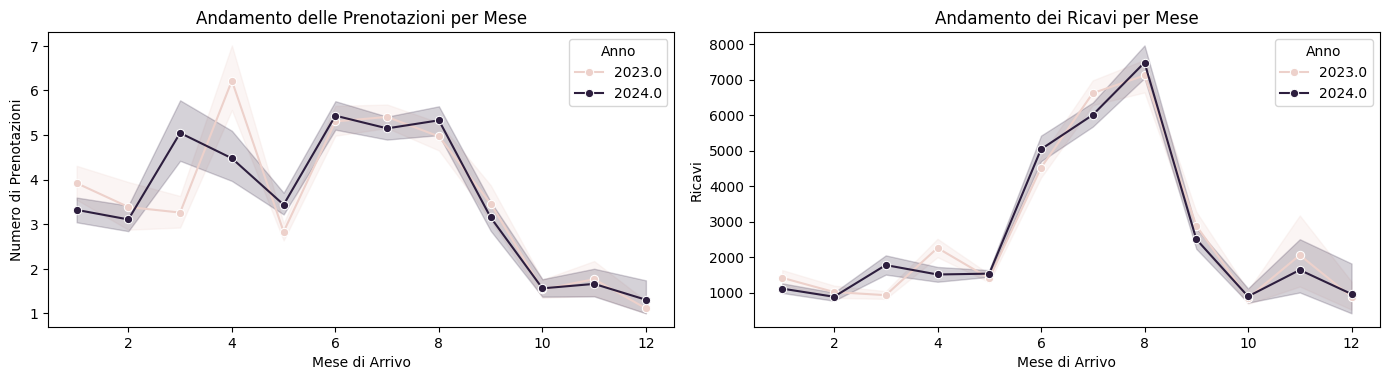

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impostazioni di default per la visualizzazione dei grafici
plt.figure(figsize=(14, 7))

# Grafico Lineare: Andamento delle prenotazioni per mese e anno
plt.subplot(2, 2, 1)
sns.lineplot(data=prenotazioni_totali, x='Prenotazione - data arrivo Mese', y='Prenotazioni', hue='Anno', marker='o')
plt.title('Andamento delle Prenotazioni per Mese')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Numero di Prenotazioni')

# Grafico Lineare: Andamento dei ricavi per mese e anno
plt.subplot(2, 2, 2)
sns.lineplot(data=prenotazioni_totali, x='Prenotazione - data arrivo Mese', y='Ricavi', hue='Anno', marker='o')
plt.title('Andamento dei Ricavi per Mese')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Ricavi')

# Adatta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()



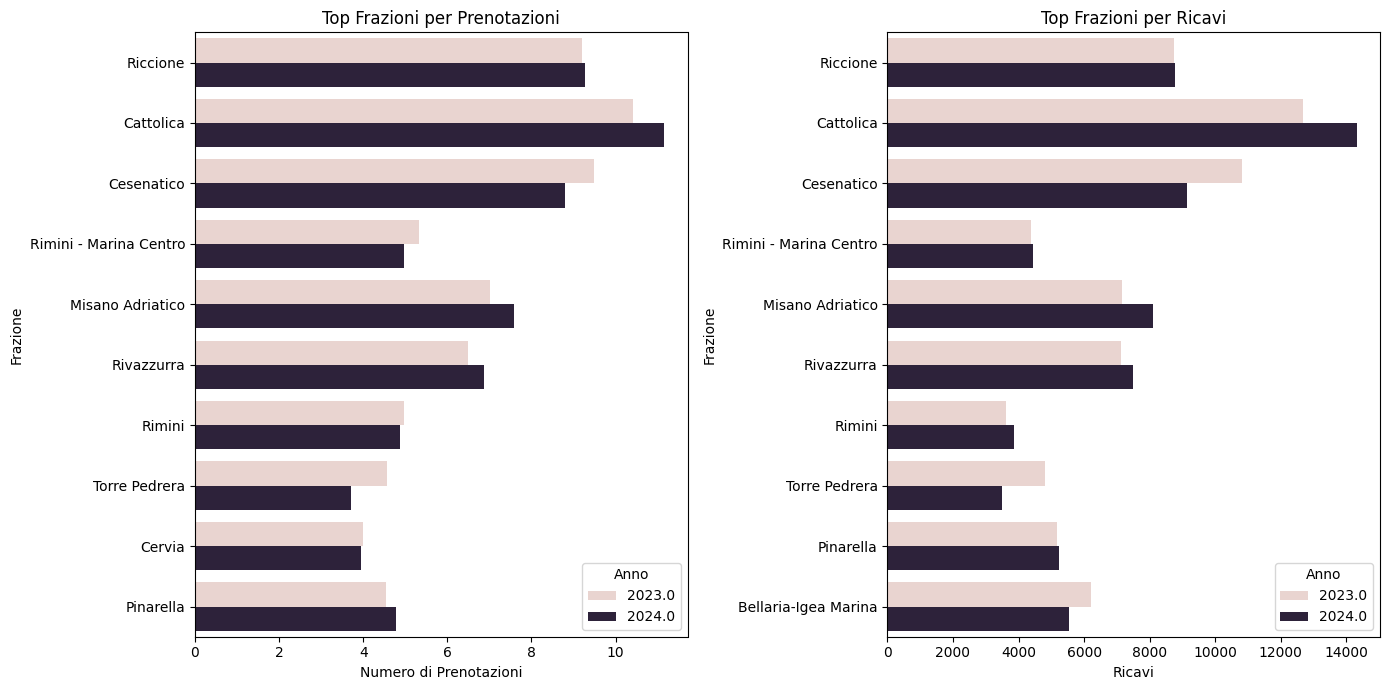

In [15]:
# Definiamo il numero massimo di frazioni da visualizzare
top_n = 10

# Trova le frazioni con il maggior numero di prenotazioni
top_prenotazioni = prenotazioni_totali.groupby('Frazione')['Prenotazioni'].sum().nlargest(top_n).index
top_ricavi = prenotazioni_totali.groupby('Frazione')['Ricavi'].sum().nlargest(top_n).index

# Filtra solo le frazioni top per le prenotazioni e ricavi
df_top_prenotazioni = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_prenotazioni)]
df_top_ricavi = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_ricavi)]

# Grafico a Barre Orizzontali: Top Prenotazioni per Frazione
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(data=df_top_prenotazioni, y='Frazione', x='Prenotazioni', hue='Anno', errorbar=None)
plt.title('Top Frazioni per Prenotazioni')
plt.xlabel('Numero di Prenotazioni')
plt.ylabel('Frazione')

# Grafico a Barre Orizzontali: Top Ricavi per Frazione
plt.subplot(1, 2, 2)
sns.barplot(data=df_top_ricavi, y='Frazione', x='Ricavi', hue='Anno', errorbar=None)
plt.title('Top Frazioni per Ricavi')
plt.xlabel('Ricavi')
plt.ylabel('Frazione')

plt.tight_layout()
plt.show()


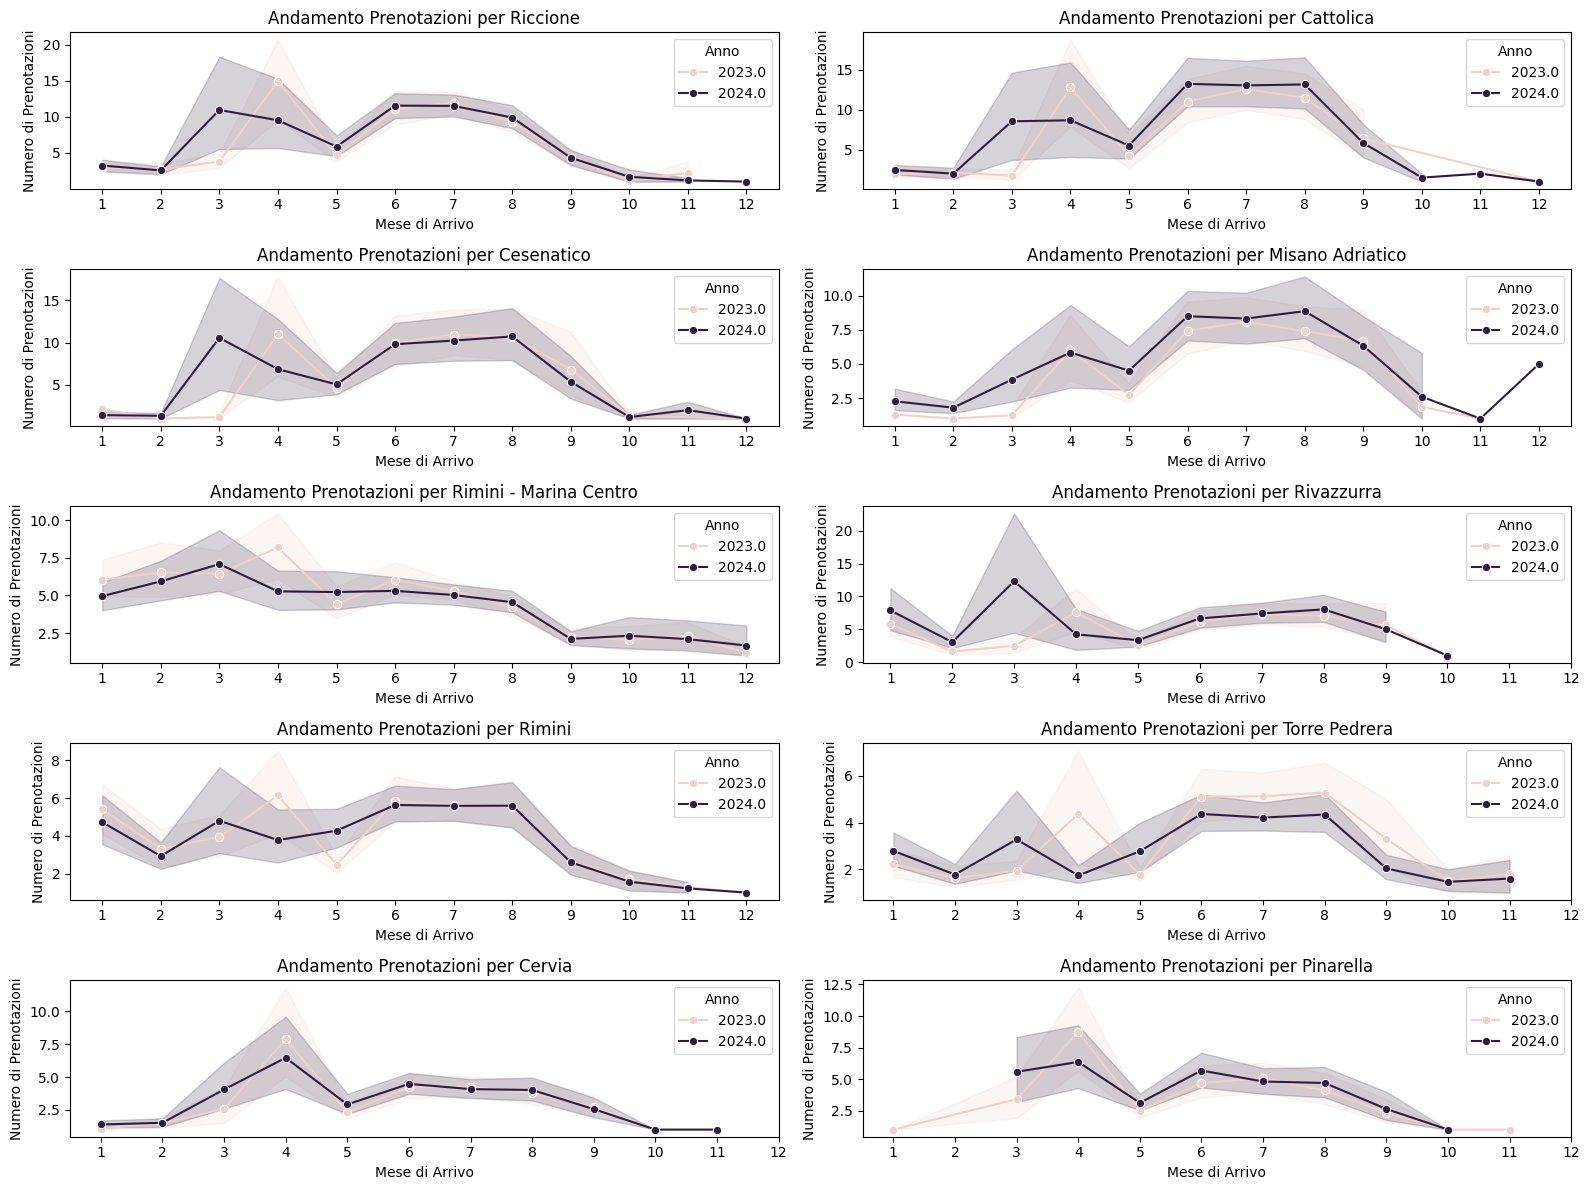

In [18]:
# Seleziona le top 10 frazioni con il maggior numero di prenotazioni
top_frazioni_prenotazioni = prenotazioni_totali.groupby('Frazione')['Prenotazioni'].sum().nlargest(10).index
df_top_frazioni = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_frazioni_prenotazioni)]

# Imposta la figura per i grafici
plt.figure(figsize=(16, 12))

# Itera attraverso le frazioni top e crea un grafico per ciascuna
for i, frazione in enumerate(top_frazioni_prenotazioni):
    plt.subplot(5, 2, i + 1)  # Organizza i grafici in 5 righe e 2 colonne
    sns.lineplot(data=df_top_frazioni[df_top_frazioni['Frazione'] == frazione],
                 x='Prenotazione - data arrivo Mese', y='Prenotazioni', hue='Anno', marker='o')
    plt.title(f'Andamento Prenotazioni per {frazione}')
    plt.xlabel('Mese di Arrivo')
    plt.ylabel('Numero di Prenotazioni')
    plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x

plt.tight_layout()
plt.show()



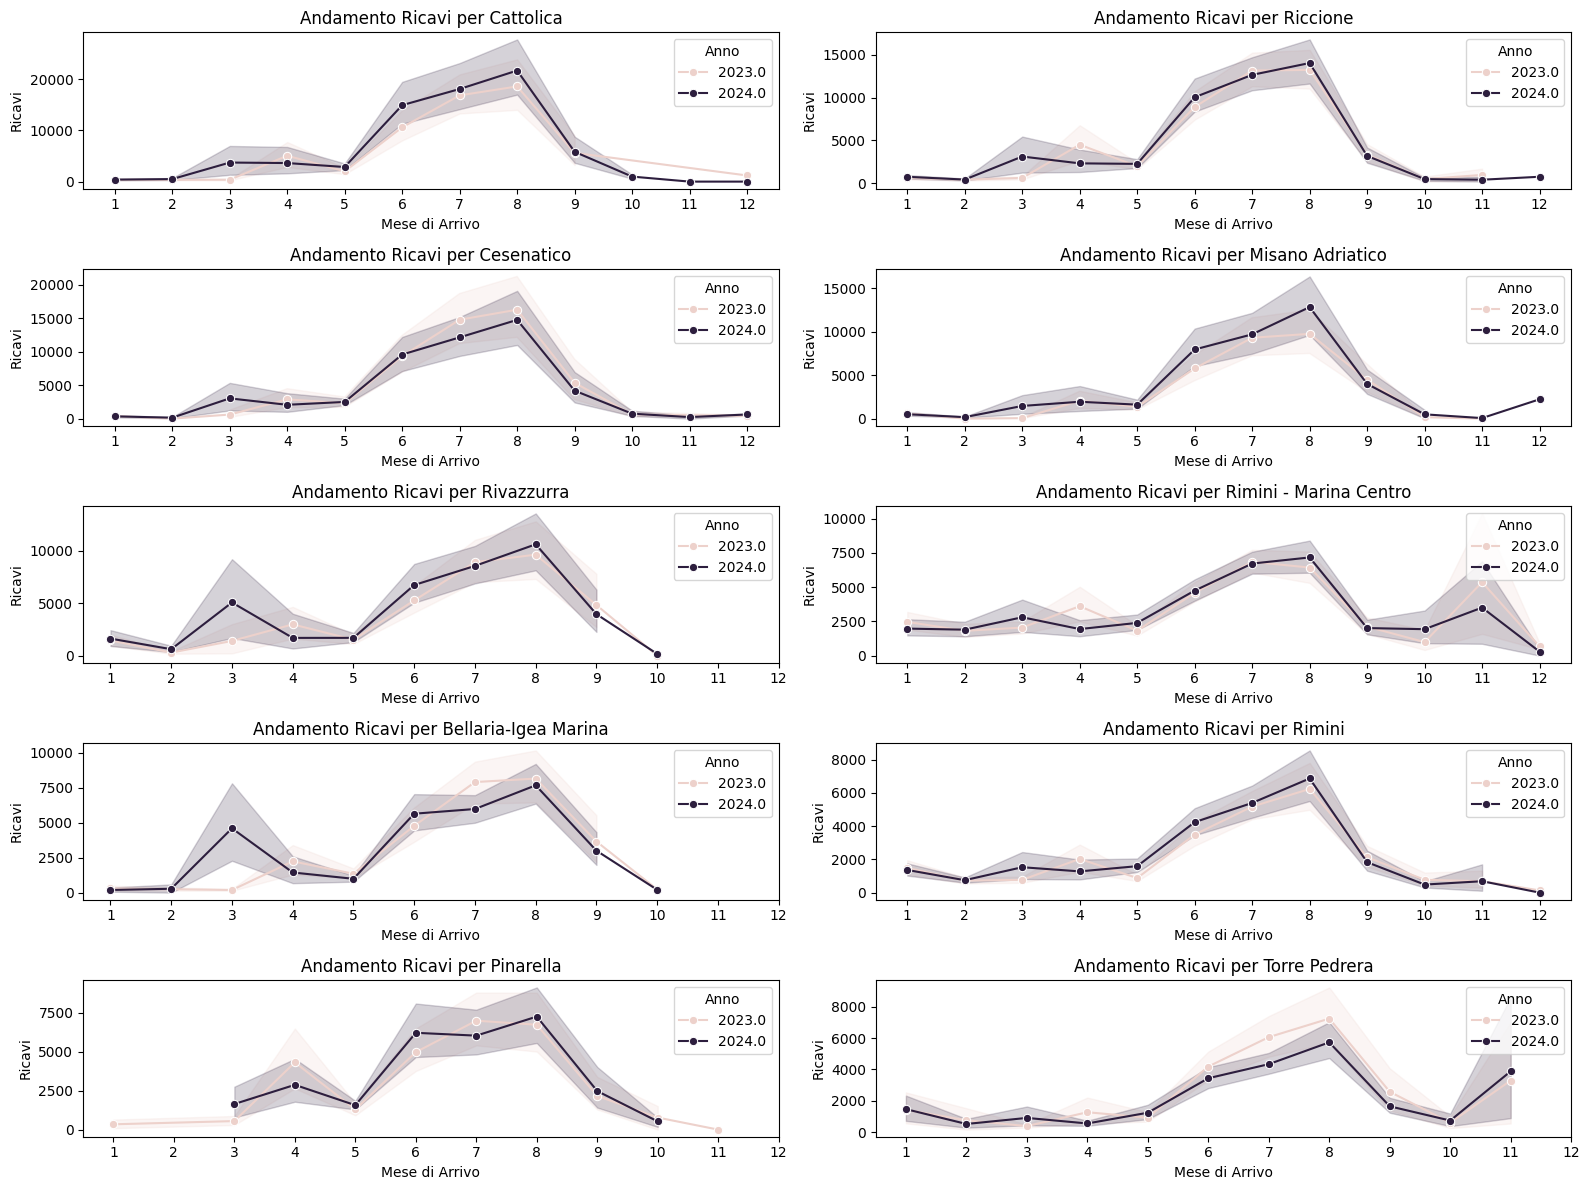

In [19]:
# Seleziona le top 10 frazioni con i maggiori ricavi
top_frazioni_ricavi = prenotazioni_totali.groupby('Frazione')['Ricavi'].sum().nlargest(10).index
df_top_frazioni_ricavi = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_frazioni_ricavi)]

# Imposta la figura per i grafici
plt.figure(figsize=(16, 12))

# Itera attraverso le frazioni top e crea un grafico per ciascuna
for i, frazione in enumerate(top_frazioni_ricavi):
    plt.subplot(5, 2, i + 1)  # Organizza i grafici in 5 righe e 2 colonne
    sns.lineplot(data=df_top_frazioni_ricavi[df_top_frazioni_ricavi['Frazione'] == frazione],
                 x='Prenotazione - data arrivo Mese', y='Ricavi', hue='Anno', marker='o')
    plt.title(f'Andamento Ricavi per {frazione}')
    plt.xlabel('Mese di Arrivo')
    plt.ylabel('Ricavi')
    plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x

plt.tight_layout()
plt.show()


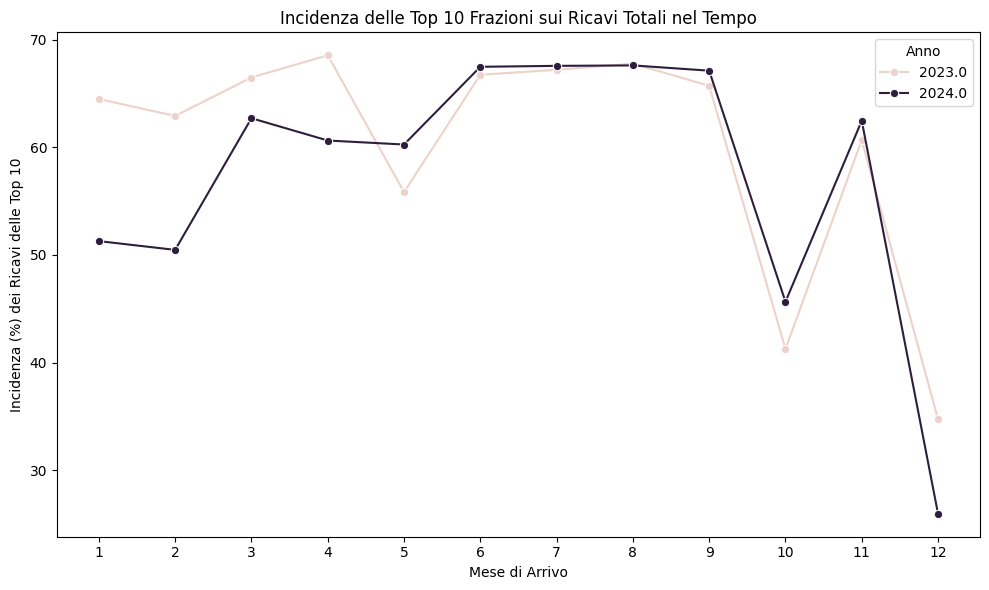

In [20]:
# Calcola i ricavi totali per mese e anno
ricavi_totali = prenotazioni_totali.groupby(['Anno', 'Prenotazione - data arrivo Mese'])['Ricavi'].sum().reset_index()

# Calcola i ricavi per le top 10 frazioni
top_frazioni_ricavi = prenotazioni_totali.groupby('Frazione')['Ricavi'].sum().nlargest(10).index
df_top_frazioni_ricavi = prenotazioni_totali[prenotazioni_totali['Frazione'].isin(top_frazioni_ricavi)]
ricavi_top_10 = df_top_frazioni_ricavi.groupby(['Anno', 'Prenotazione - data arrivo Mese'])['Ricavi'].sum().reset_index()

# Unisci i due DataFrame sui mesi e anni
ricavi_confronto = pd.merge(ricavi_totali, ricavi_top_10, on=['Anno', 'Prenotazione - data arrivo Mese'], suffixes=('_totali', '_top_10'))

# Calcola la percentuale di incidenza delle top 10 sui ricavi totali
ricavi_confronto['Incidenza (%)'] = (ricavi_confronto['Ricavi_top_10'] / ricavi_confronto['Ricavi_totali']) * 100

# Grafico Lineare: Incidenza delle Top 10 Frazioni sui Ricavi Generali nel Tempo
plt.figure(figsize=(10, 6))
sns.lineplot(data=ricavi_confronto, x='Prenotazione - data arrivo Mese', y='Incidenza (%)', hue='Anno', marker='o')
plt.title('Incidenza delle Top 10 Frazioni sui Ricavi Totali nel Tempo')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Incidenza (%) dei Ricavi delle Top 10')
plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x
plt.tight_layout()
plt.show()

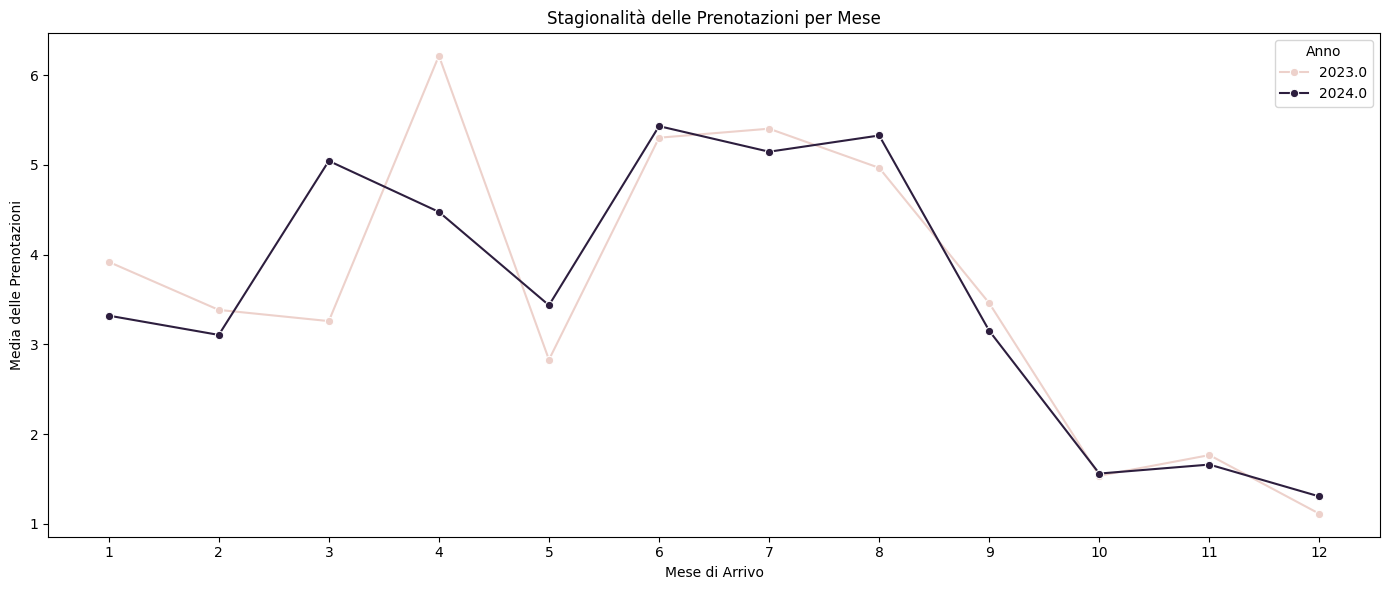

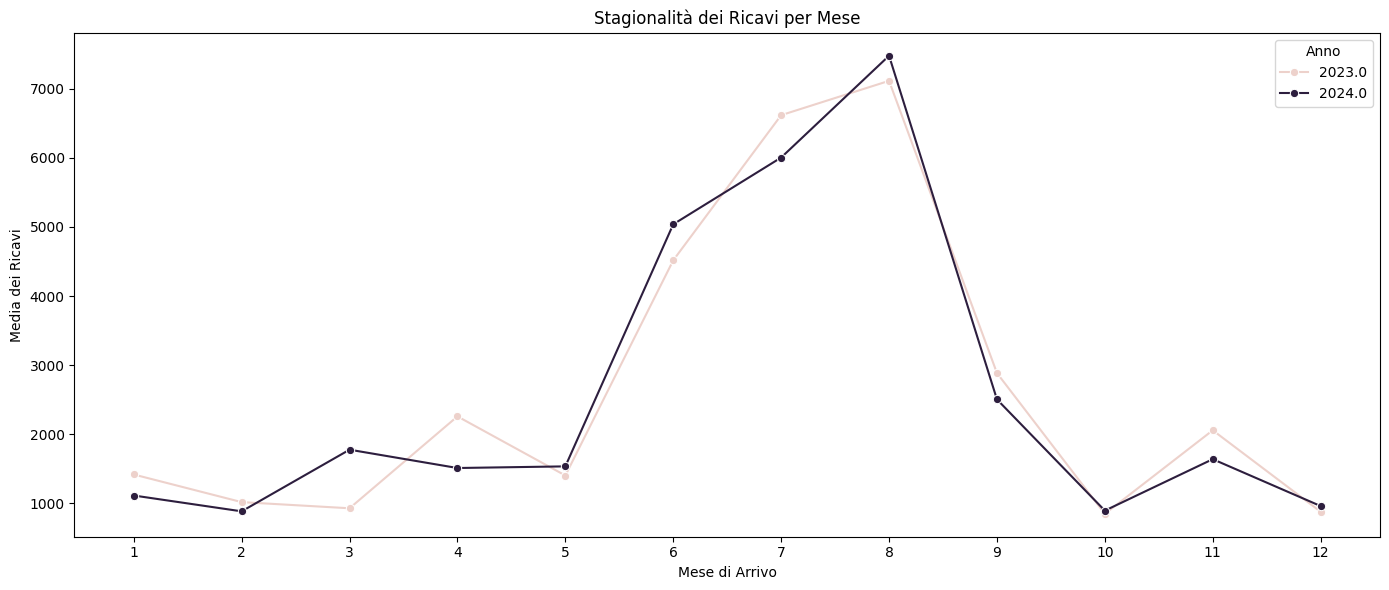

In [21]:
# Calcolo delle medie mensili dei ricavi e prenotazioni
stagionalita = prenotazioni_totali.groupby(['Prenotazione - data arrivo Mese', 'Anno']).agg({
    'Prenotazioni': 'mean',
    'Ricavi': 'mean'
}).reset_index()

# Grafico Lineare: Stagionalità delle Prenotazioni
plt.figure(figsize=(14, 6))
sns.lineplot(data=stagionalita, x='Prenotazione - data arrivo Mese', y='Prenotazioni', hue='Anno', marker='o')
plt.title('Stagionalità delle Prenotazioni per Mese')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Media delle Prenotazioni')
plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x
plt.tight_layout()
plt.show()

# Grafico Lineare: Stagionalità dei Ricavi
plt.figure(figsize=(14, 6))
sns.lineplot(data=stagionalita, x='Prenotazione - data arrivo Mese', y='Ricavi', hue='Anno', marker='o')
plt.title('Stagionalità dei Ricavi per Mese')
plt.xlabel('Mese di Arrivo')
plt.ylabel('Media dei Ricavi')
plt.xticks(range(1, 13))  # Imposta i mesi sull'asse x
plt.tight_layout()
plt.show()


/var/folders/c1/g391tnvs465fkh1wg6gy8p3h0000gn/T/ipykernel_3591/2082606452.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_frazioni_primavera.head(10), x='Frazione', y='Ricavi', palette='viridis')


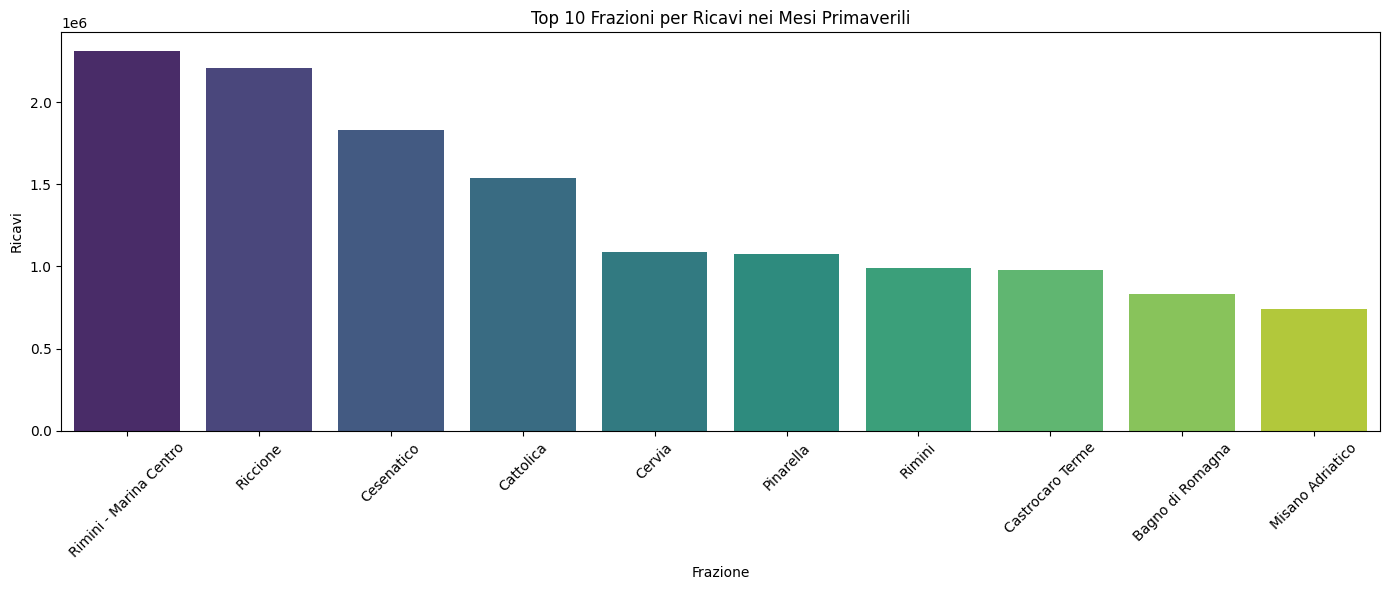

/var/folders/c1/g391tnvs465fkh1wg6gy8p3h0000gn/T/ipykernel_3591/2082606452.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_frazioni_primavera.head(10), x='Frazione', y='Prenotazioni', palette='viridis')


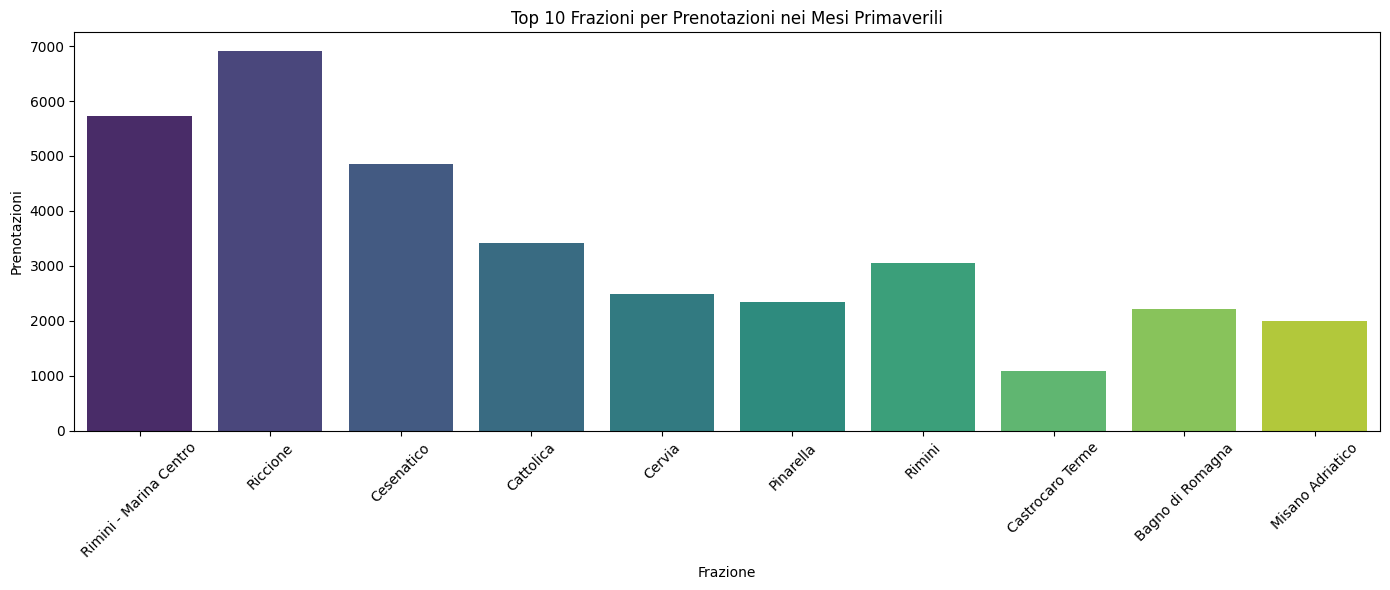

In [22]:
# Filtra i dati per i mesi primaverili (marzo, aprile, maggio)
mesi_primaverili = [3, 4, 5]
dati_primavera = prenotazioni_totali[prenotazioni_totali['Prenotazione - data arrivo Mese'].isin(mesi_primaverili)]

# Calcola le performance per frazione nei mesi primaverili
performance_primavera = dati_primavera.groupby('Frazione').agg({
    'Prenotazioni': 'sum',
    'Ricavi': 'sum'
}).reset_index()

# Ordina per migliori performance in termini di ricavi
top_frazioni_primavera = performance_primavera.sort_values(by='Ricavi', ascending=False)

# Visualizza le prime 10 frazioni per ricavi nei mesi primaverili
plt.figure(figsize=(14, 6))
sns.barplot(data=top_frazioni_primavera.head(10), x='Frazione', y='Ricavi', palette='viridis')
plt.title('Top 10 Frazioni per Ricavi nei Mesi Primaverili')
plt.xlabel('Frazione')
plt.ylabel('Ricavi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizza le prime 10 frazioni per prenotazioni nei mesi primaverili
plt.figure(figsize=(14, 6))
sns.barplot(data=top_frazioni_primavera.head(10), x='Frazione', y='Prenotazioni', palette='viridis')
plt.title('Top 10 Frazioni per Prenotazioni nei Mesi Primaverili')
plt.xlabel('Frazione')
plt.ylabel('Prenotazioni')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/c1/g391tnvs465fkh1wg6gy8p3h0000gn/T/ipykernel_3591/2905375162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_primavera['Ricavi Aumentati'] = dati_primavera['Ricavi'] * 1.10
/var/folders/c1/g391tnvs465fkh1wg6gy8p3h0000gn/T/ipykernel_3591/2905375162.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=nuovi_ricavi_per_frazione.head(10), x='Frazione', y='Aumento Ricavi', palette='viridis')


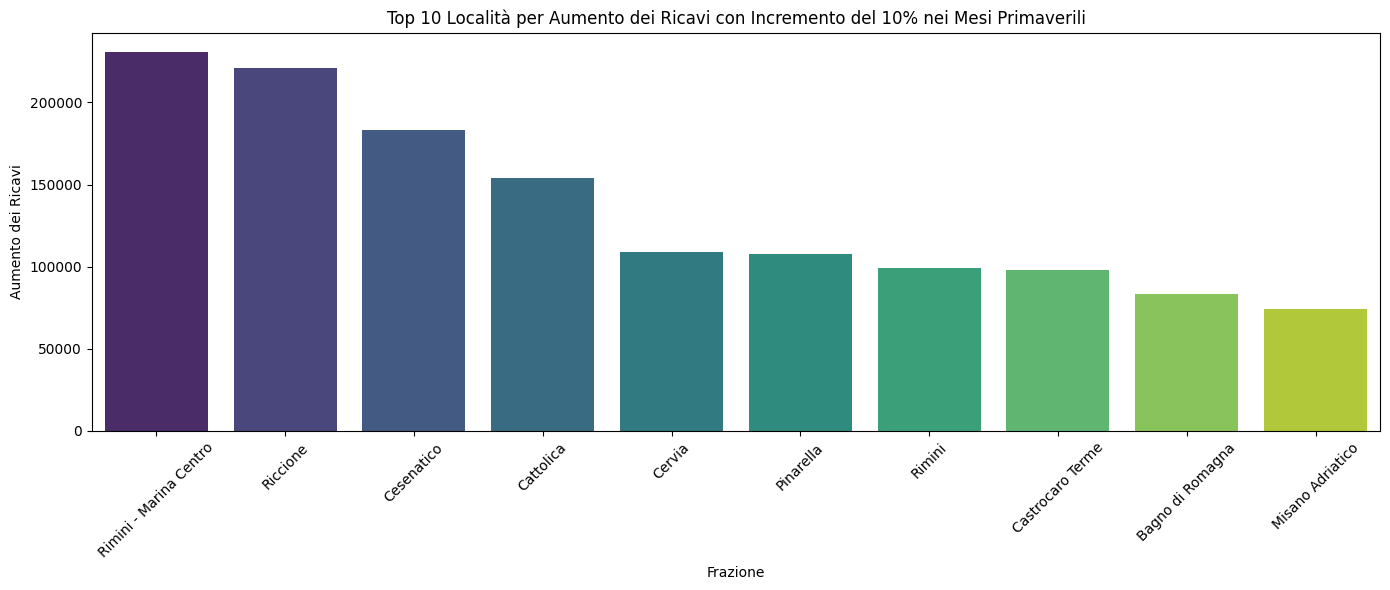

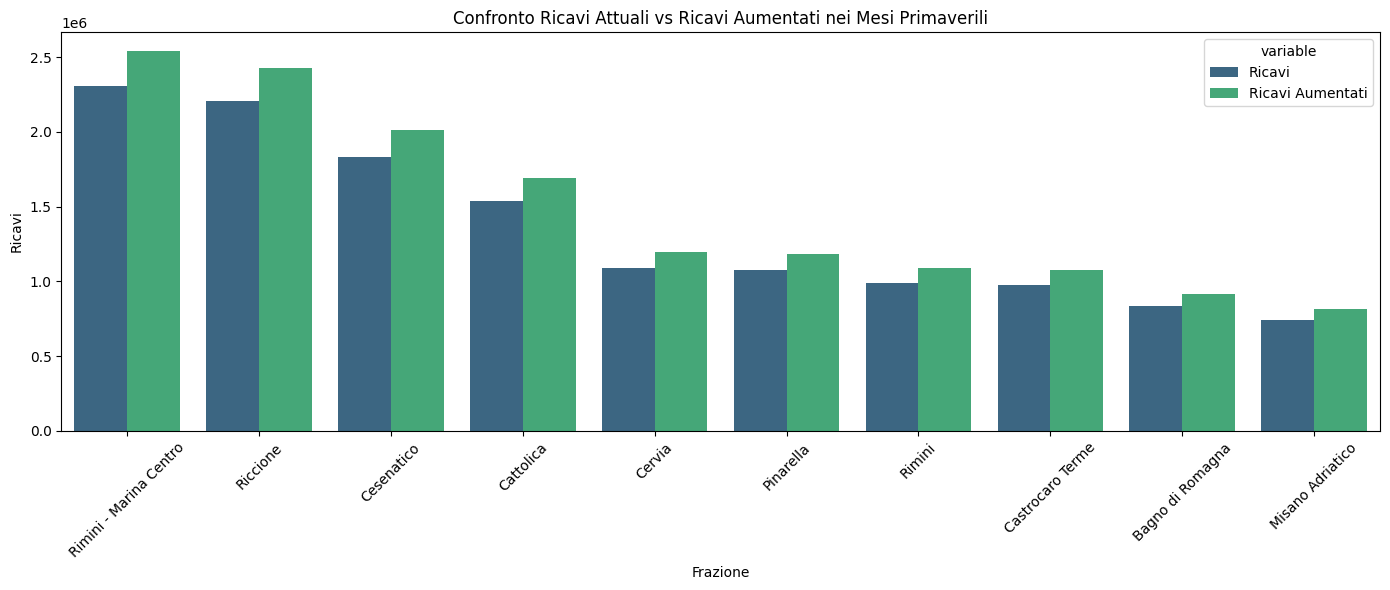

In [26]:
# Filtra i dati per i mesi primaverili (marzo, aprile, maggio)
mesi_primaverili = [3, 4, 5]
dati_primavera = prenotazioni_totali[prenotazioni_totali['Prenotazione - data arrivo Mese'].isin(mesi_primaverili)]

# Aumenta del 10% i ricavi nei mesi primaverili
dati_primavera['Ricavi Aumentati'] = dati_primavera['Ricavi'] * 1.10

# Calcola i nuovi ricavi per frazione
nuovi_ricavi_per_frazione = dati_primavera.groupby('Frazione').agg({
    'Ricavi': 'sum',
    'Ricavi Aumentati': 'sum'
}).reset_index()

# Calcola l'aumento assoluto dei ricavi
nuovi_ricavi_per_frazione['Aumento Ricavi'] = nuovi_ricavi_per_frazione['Ricavi Aumentati'] - nuovi_ricavi_per_frazione['Ricavi']

# Ordina le frazioni per il maggiore aumento dei ricavi
nuovi_ricavi_per_frazione = nuovi_ricavi_per_frazione.sort_values(by='Aumento Ricavi', ascending=False)

# Visualizza le prime 10 località con il maggiore aumento dei ricavi
plt.figure(figsize=(14, 6))
sns.barplot(data=nuovi_ricavi_per_frazione.head(10), x='Frazione', y='Aumento Ricavi', palette='viridis')
plt.title('Top 10 Località per Aumento dei Ricavi con Incremento del 10% nei Mesi Primaverili')
plt.xlabel('Frazione')
plt.ylabel('Aumento dei Ricavi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizza i nuovi ricavi rispetto ai ricavi attuali per le top località
plt.figure(figsize=(14, 6))
sns.barplot(data=nuovi_ricavi_per_frazione.head(10).melt(id_vars=['Frazione'], value_vars=['Ricavi', 'Ricavi Aumentati']),
            x='Frazione', y='value', hue='variable', palette='viridis')
plt.title('Confronto Ricavi Attuali vs Ricavi Aumentati nei Mesi Primaverili')
plt.xlabel('Frazione')
plt.ylabel('Ricavi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


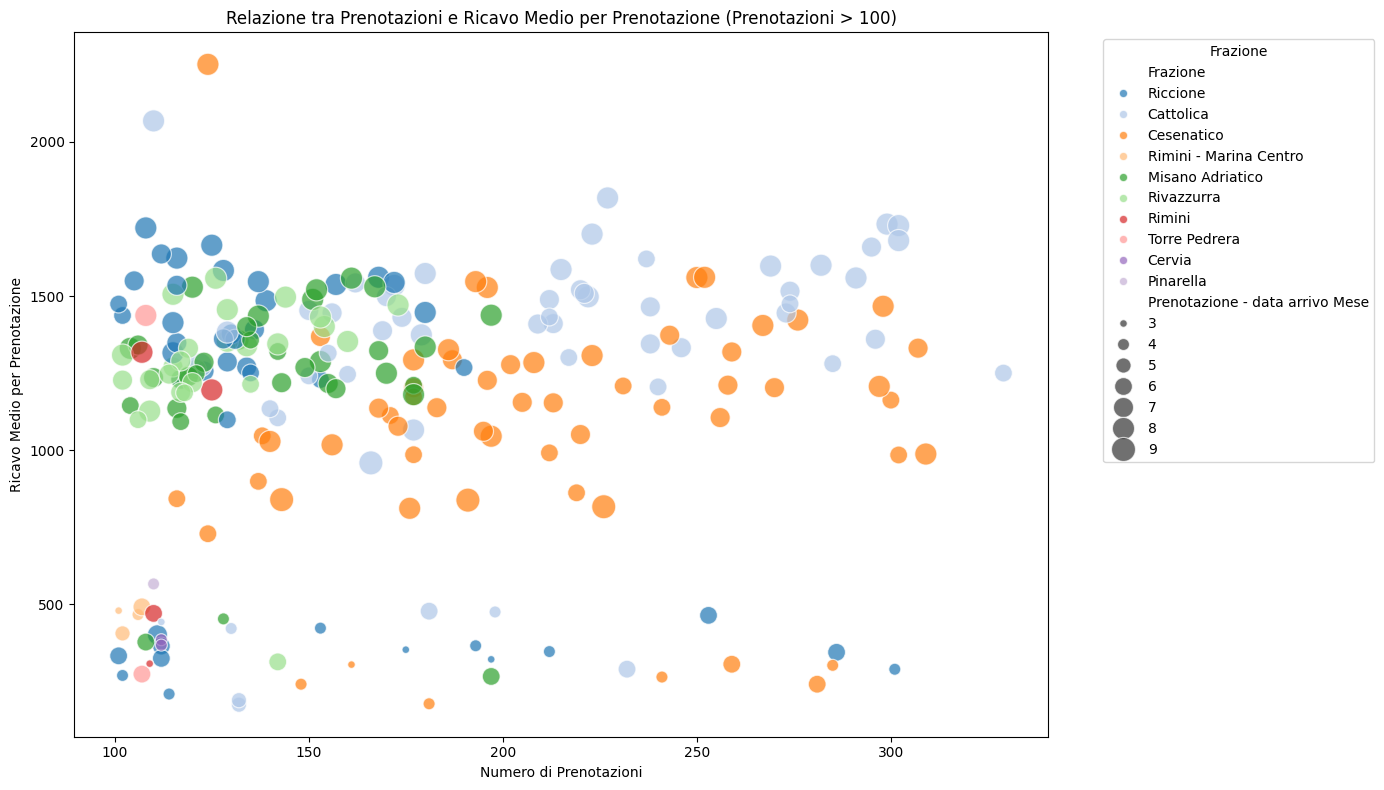

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola il ricavo medio per prenotazione per ciascuna riga
prenotazioni_totali['Ricavo Medio per Prenotazione'] = prenotazioni_totali['Ricavi'] / prenotazioni_totali['Prenotazioni']

# Filtra per prenotazioni > 100 e valori positivi per evitare divisioni per zero o valori NaN
prenotazioni_filtrate = prenotazioni_totali[(prenotazioni_totali['Prenotazioni'] > 100) & (prenotazioni_totali['Ricavi'] > 0)]

# Grafico a dispersione per visualizzare la relazione tra prenotazioni e ricavo medio per prenotazione
plt.figure(figsize=(14, 8))
sns.scatterplot(data=prenotazioni_filtrate, 
                x='Prenotazioni', 
                y='Ricavo Medio per Prenotazione', 
                hue='Frazione', 
                size='Prenotazione - data arrivo Mese',
                sizes=(30, 300),
                alpha=0.7,
                palette='tab20')
plt.title('Relazione tra Prenotazioni e Ricavo Medio per Prenotazione (Prenotazioni > 100)')
plt.xlabel('Numero di Prenotazioni')
plt.ylabel('Ricavo Medio per Prenotazione')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Frazione')
plt.tight_layout()
plt.show()


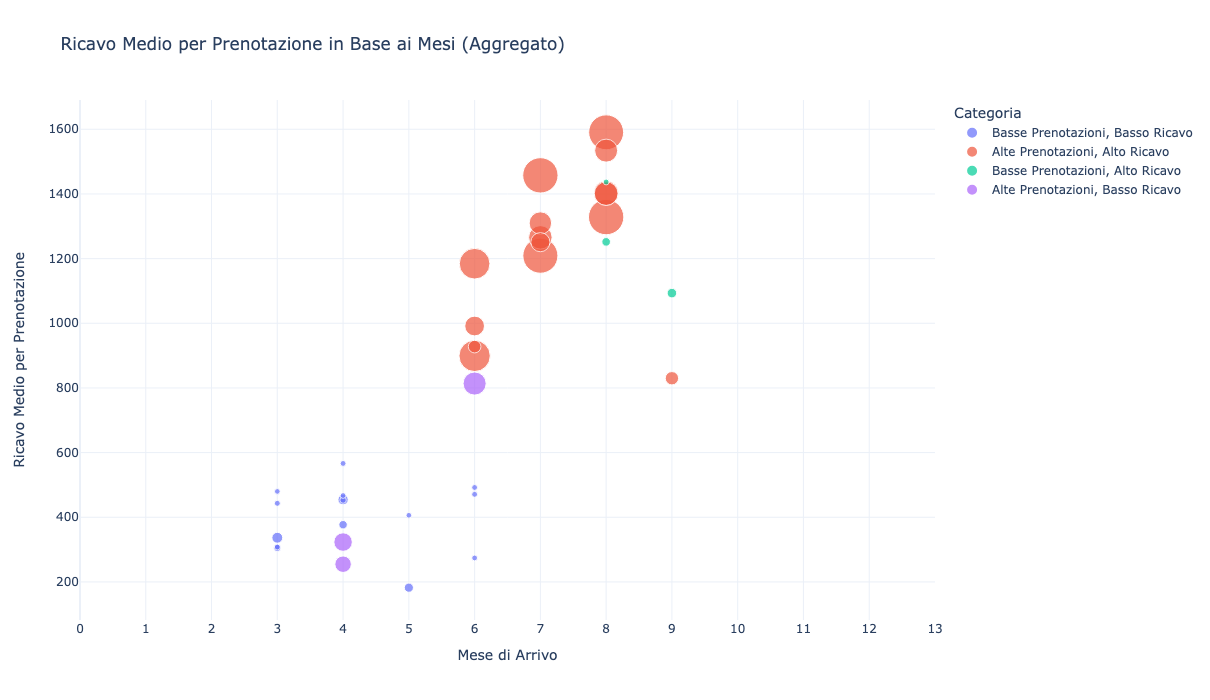

In [39]:
import plotly.express as px
import pandas as pd

# Aggrega i dati per frazione e mese
prenotazioni_aggregate = prenotazioni_filtrate.groupby(['Frazione', 'Prenotazione - data arrivo Mese']).agg({
    'Prenotazioni': 'sum',                      # Somma delle prenotazioni
    'Ricavi': 'sum'                             # Somma dei ricavi
}).reset_index()

# Calcola il ricavo medio per prenotazione aggregato
prenotazioni_aggregate['Ricavo Medio per Prenotazione'] = prenotazioni_aggregate['Ricavi'] / prenotazioni_aggregate['Prenotazioni']

# Classifica le frazioni nei cluster (come fatto precedentemente) dopo l'aggregazione
soglia_prenotazioni = prenotazioni_aggregate['Prenotazioni'].median()
soglia_ricavi = prenotazioni_aggregate['Ricavo Medio per Prenotazione'].median()

# Funzione per classificare le frazioni nei cluster
def classificazione(prenotazioni, ricavo_medio, soglia_prenotazioni, soglia_ricavi):
    if prenotazioni > soglia_prenotazioni and ricavo_medio > soglia_ricavi:
        return 'Alte Prenotazioni, Alto Ricavo'
    elif prenotazioni > soglia_prenotazioni and ricavo_medio <= soglia_ricavi:
        return 'Alte Prenotazioni, Basso Ricavo'
    elif prenotazioni <= soglia_prenotazioni and ricavo_medio > soglia_ricavi:
        return 'Basse Prenotazioni, Alto Ricavo'
    else:
        return 'Basse Prenotazioni, Basso Ricavo'

# Applica la classificazione
prenotazioni_aggregate['Categoria'] = prenotazioni_aggregate.apply(
    lambda row: classificazione(row['Prenotazioni'], row['Ricavo Medio per Prenotazione'], soglia_prenotazioni, soglia_ricavi), 
    axis=1
)

# Creazione del grafico interattivo con Plotly usando i dati aggregati
fig = px.scatter(
    prenotazioni_aggregate,
    x='Prenotazione - data arrivo Mese',  # Visualizzazione in base ai mesi
    y='Ricavo Medio per Prenotazione',
    color='Categoria',
    hover_name='Frazione',  # Mostra il nome della frazione al passaggio del mouse
    size='Prenotazioni',    # La dimensione dei punti rappresenta il numero di prenotazioni
    size_max=25,            # Riduce la dimensione massima dei punti
    title='Ricavo Medio per Prenotazione in Base ai Mesi (Aggregato)',
    labels={
        'Prenotazione - data arrivo Mese': 'Mese di Arrivo',
        'Ricavo Medio per Prenotazione': 'Ricavo Medio per Prenotazione',
        'Categoria': 'Categoria'
    },
    template='plotly_white'  # Stile del grafico
)

# Aggiusta il range degli assi per ingrandire la vista
fig.update_layout(
    xaxis=dict(
        title='Mese di Arrivo',
        tickmode='linear',  # Mostra tutti i mesi sull'asse
        tickvals=list(range(1, 13)),  # Mostra i mesi da 1 a 12
        range=[0, 13]  # Estende il range dell'asse X per includere tutti i mesi
    ),
    yaxis=dict(
        title='Ricavo Medio per Prenotazione',
        range=[prenotazioni_aggregate['Ricavo Medio per Prenotazione'].min() - 100, 
               prenotazioni_aggregate['Ricavo Medio per Prenotazione'].max() + 100]  # Estende il range dell'asse Y
    ),
    width=1000,  # Imposta una larghezza maggiore per il grafico
    height=700   # Imposta un'altezza maggiore per il grafico
)

# Mostra il grafico interattivo
fig.show()



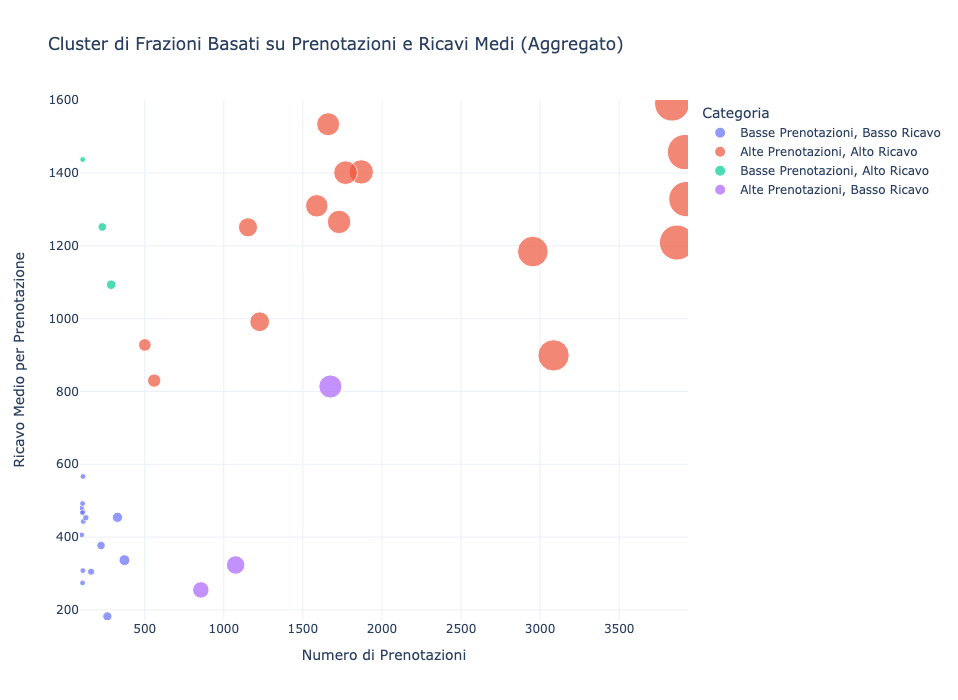

In [41]:
import plotly.express as px
import pandas as pd

# Aggrega i dati per frazione e mese, calcolando la somma di prenotazioni e ricavi
prenotazioni_aggregate = prenotazioni_filtrate.groupby(['Frazione', 'Prenotazione - data arrivo Mese']).agg({
    'Prenotazioni': 'sum',   # Somma delle prenotazioni
    'Ricavi': 'sum'          # Somma dei ricavi
}).reset_index()

# Calcola il ricavo medio per prenotazione
prenotazioni_aggregate['Ricavo Medio per Prenotazione'] = prenotazioni_aggregate['Ricavi'] / prenotazioni_aggregate['Prenotazioni']

# Definisci le soglie per classificare i ricavi e le prenotazioni come "alti" o "bassi"
soglia_prenotazioni = prenotazioni_aggregate['Prenotazioni'].median()
soglia_ricavi = prenotazioni_aggregate['Ricavo Medio per Prenotazione'].median()

# Funzione per classificare nei cluster
def classificazione(prenotazioni, ricavo_medio, soglia_prenotazioni, soglia_ricavi):
    if prenotazioni > soglia_prenotazioni and ricavo_medio > soglia_ricavi:
        return 'Alte Prenotazioni, Alto Ricavo'
    elif prenotazioni > soglia_prenotazioni and ricavo_medio <= soglia_ricavi:
        return 'Alte Prenotazioni, Basso Ricavo'
    elif prenotazioni <= soglia_prenotazioni and ricavo_medio > soglia_ricavi:
        return 'Basse Prenotazioni, Alto Ricavo'
    else:
        return 'Basse Prenotazioni, Basso Ricavo'

# Applica la classificazione ai dati aggregati
prenotazioni_aggregate['Categoria'] = prenotazioni_aggregate.apply(
    lambda row: classificazione(row['Prenotazioni'], row['Ricavo Medio per Prenotazione'], soglia_prenotazioni, soglia_ricavi), 
    axis=1
)

# Creazione del grafico interattivo con Plotly per visualizzare i cluster con il mese
fig = px.scatter(
    prenotazioni_aggregate,
    x='Prenotazioni',
    y='Ricavo Medio per Prenotazione',
    color='Categoria',
    hover_name='Frazione',  # Mostra il nome della frazione al passaggio del mouse
    size='Prenotazioni',    # La dimensione dei punti rappresenta il numero di prenotazioni
    size_max=25,            # Riduce la dimensione massima dei punti
    title='Cluster di Frazioni Basati su Prenotazioni e Ricavi Medi (Aggregato)',
    labels={
        'Prenotazioni': 'Numero di Prenotazioni',
        'Ricavo Medio per Prenotazione': 'Ricavo Medio per Prenotazione',
        'Categoria': 'Categoria'
    },
    template='plotly_white'  # Stile del grafico
)

# Aggiungi il mese al hover_data per vedere in quale mese la frazione si trova in quel cluster
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>Categoria: %{marker.color}<br>Prenotazioni: %{x}<br>Ricavi Medi: %{y}<br>Mese: %{customdata[0]}',
                  customdata=prenotazioni_aggregate[['Prenotazione - data arrivo Mese']])

# Aggiusta il range degli assi per una migliore visualizzazione
fig.update_layout(
    xaxis=dict(
        title='Numero di Prenotazioni',
        range=[prenotazioni_aggregate['Prenotazioni'].min() - 10, prenotazioni_aggregate['Prenotazioni'].max() + 10]  # Estende il range dell'asse X
    ),
    yaxis=dict(
        title='Ricavo Medio per Prenotazione',
        range=[prenotazioni_aggregate['Ricavo Medio per Prenotazione'].min() - 10, 
               prenotazioni_aggregate['Ricavo Medio per Prenotazione'].max() + 10]  # Estende il range dell'asse Y
    ),
    width=1000,  # Imposta una larghezza maggiore per il grafico
    height=700   # Imposta un'altezza maggiore per il grafico
)

# Mostra il grafico interattivo
fig.show()

